## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as nltk_download
nltk_download('punkt_tab')
nltk_download('stopwords')
nltk_download('wordnet')
from wordcloud import WordCloud
import requests
import csv
from tqdm import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading Dataset

In [2]:
df = pd.read_csv('gojek-app_review.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,595da86c-acc1-4a64-ae43-90ff85eaf53d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terlalu terlalu terlalu... apk yg tidak bisa d...,1,1,4.31.1,2022-04-21 20:37:07,"Hai, mohon maaf atas kendala yang kamu alami. ...",2022-04-22 08:33:31,4.31.1
1,9f871c14-7d44-4f0d-8cbe-9904d42cf3b6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak usah pasang tarif tarif hemat, soalnya par...",1,118,5.14.2,2025-03-21 21:44:12,"Hai Kak Evi, mohon maaf atas ketidaknyamananny...",2025-03-21 22:05:01,5.14.2
2,825e4595-c073-4388-8229-415e372b6c01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tinggal 2menit lg driver sampe di lokasi tiba-...,1,42,5.14.2,2025-03-26 07:35:56,"Hai Kak Wahyu, mohon maaf atas ketidaknyamanan...",2025-03-26 11:26:47,5.14.2
3,bd0d000e-8173-4387-8839-15f43af6c9ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Beberapa driver ada yang nggak membaca pesan d...,2,0,5.14.2,2025-03-31 15:23:45,"Hai Kak Ferdiansyah, mohon maaf atas ketidakny...",2025-03-31 15:48:42,5.14.2
4,cb8f275d-1318-4a5b-b40a-0c33cb89d08a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Update aplikasinya malah menyusahkan. Pesan da...,1,73,5.13.1,2025-03-17 05:25:29,"Hai Kak Michael, mohon maaf atas ketidaknyaman...",2025-03-17 07:18:53,5.13.1
...,...,...,...,...,...,...,...,...,...,...,...
80995,0de78942-8671-40e7-8c5f-a2f6960c17f0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,parah gopay kecewa transfer duit 50 rb doang a...,1,1,4.15.1,2021-03-19 20:00:14,NaN,NaN,4.15.1
80996,e01d9104-dc88-4dca-ae24-2d537ffe31fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kl pesan gocar yg jaraknya dekat kog susah ban...,1,0,4.63.2,2023-03-18 13:18:17,"Hai Lily Tjoa, mohon maaf atas kendalanya. Kes...",2023-03-19 10:18:38,4.63.2
80997,6359ef7b-726d-4c75-b742-9ee86e5c080a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya dan pelayanan bagus dan mudah di u...,4,0,4.3.1,2020-09-14 00:40:36,NaN,NaN,4.3.1
80998,7edbef70-7c78-4bd3-b33b-722ce945e016,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf sy kurangi ☆ nya karna bugnya banyak bgt ...,2,0,4.37.2,2022-04-23 20:06:06,"Hai Rama Pranata, mohon maaf untuk kendalanya....",2022-04-24 13:22:42,4.37.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81000 entries, 0 to 80999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              81000 non-null  object
 1   userName              81000 non-null  object
 2   userImage             81000 non-null  object
 3   content               80999 non-null  object
 4   score                 81000 non-null  int64 
 5   thumbsUpCount         81000 non-null  int64 
 6   reviewCreatedVersion  65158 non-null  object
 7   at                    81000 non-null  object
 8   replyContent          30488 non-null  object
 9   repliedAt             30488 non-null  object
 10  appVersion            65158 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.8+ MB


In [4]:
missing_data = df.isna().sum()
print('Missing data in each column:')
print(missing_data)
print(' ')
df.dropna(inplace=True)
print('Data after dropping missing values:')
print(df.isna().sum())

Missing data in each column:
reviewId                    0
userName                    0
userImage                   0
content                     1
score                       0
thumbsUpCount               0
reviewCreatedVersion    15842
at                          0
replyContent            50512
repliedAt               50512
appVersion              15842
dtype: int64
 
Data after dropping missing values:
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64


In [5]:
clean_df = df.dropna(subset=['content'])
clean_df = clean_df.drop_duplicates()

In [6]:
clean_df = df.drop(columns=['userName', 'reviewId', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion',     'replyContent', 'repliedAt', 'appVersion', 'at'])
clean_df.head()

,content,score
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1
1,"Gak usah pasang tarif tarif hemat, soalnya par...",1
2,tinggal 2menit lg driver sampe di lokasi tiba-...,1
3,Beberapa driver ada yang nggak membaca pesan d...,2
4,Update aplikasinya malah menyusahkan. Pesan da...,1


In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24111 entries, 0 to 80998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  24111 non-null  object
 1   score    24111 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 565.1+ KB


**Insight**:
- Terdapat nilai NaN dan duplikasi pada Dataset sehingga perlu dibersihkan.
- Terdapat fitur yg kurang penting sehingga perlu dilakukan seleksi untuk menampilkan kolom fitur yg penting pada Dataframe.

## Distribution Analysis

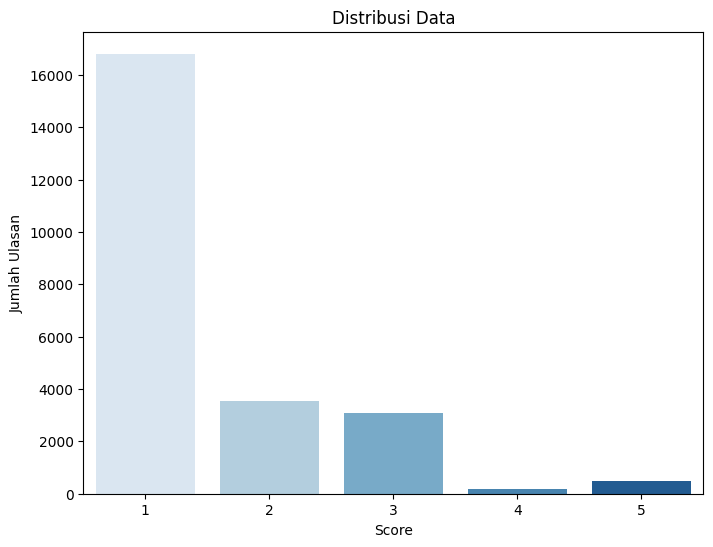

In [8]:
hitung_score = clean_df['score'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=hitung_score.index, y=hitung_score.values, palette="Blues")
plt.title('Distribusi Data')
plt.xlabel('Score')
plt.ylabel('Jumlah Ulasan')
plt.show()

**Insight**:
- Didapatkan distribusi data dengan jumlah ulasan terbanyak pada penilaian Score = 1

## Preprocessing

**Removing Data Duplicate**

In [9]:
clean_df.drop_duplicates(subset='content', keep='first', inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24109 entries, 0 to 80998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  24109 non-null  object
 1   score    24109 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 565.1+ KB


**Fungsi Preprocessing**

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "gk", "g", "x"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
    
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

**Fungsi Konversi Slangwords**

In [11]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "gak": "tidak", "apk": "aplikasi", "rb": "ribu"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

**Melakukan Preprocessing pada Text**

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].progress_apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].progress_apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].progress_apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].progress_apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].progress_apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_final'
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)

100%|██████████| 24109/24109 [00:22<00:00, 1076.76it/s]


In [13]:
clean_df.head()

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_final
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu aplikasi yang tidak bi...,"[terlalu, terlalu, terlalu, aplikasi, yang, ti...","[aplikasi, percaya, kuota, cepat, habis, updat...",aplikasi percaya kuota cepat habis update bug ...
1,"Gak usah pasang tarif tarif hemat, soalnya par...",1,Gak usah pasang tarif tarif hemat soalnya para...,gak usah pasang tarif tarif hemat soalnya para...,tidak perlu pasang tarif tarif hemat soalnya p...,"[tidak, perlu, pasang, tarif, tarif, hemat, so...","[pasang, tarif, tarif, hemat, driver, ambil, o...",pasang tarif tarif hemat driver ambil orderan ...
2,tinggal 2menit lg driver sampe di lokasi tiba-...,1,tinggal menit lg driver sampe di lokasi tibati...,tinggal menit lg driver sampe di lokasi tibati...,tinggal menit lagi driver sampai di lokasi tib...,"[tinggal, menit, lagi, driver, sampai, di, lok...","[tinggal, menit, driver, lokasi, tibatiba, dib...",tinggal menit driver lokasi tibatiba dibatalin...
3,Beberapa driver ada yang nggak membaca pesan d...,2,Beberapa driver ada yang nggak membaca pesan d...,beberapa driver ada yang nggak membaca pesan d...,beberapa driver ada yang tidak membaca pesan d...,"[beberapa, driver, ada, yang, tidak, membaca, ...","[driver, membaca, pesan, memilih, panggilan, t...",driver membaca pesan memilih panggilan telefon...
4,Update aplikasinya malah menyusahkan. Pesan da...,1,Update aplikasinya malah menyusahkan Pesan dar...,update aplikasinya malah menyusahkan pesan dar...,update aplikasinya bahkan menyusahkan pesan da...,"[update, aplikasinya, bahkan, menyusahkan, pes...","[update, aplikasinya, menyusahkan, pesan, ruma...",update aplikasinya menyusahkan pesan rumah sta...


**Insight**:
- Menghilangkan ulasan yg memiliki duplikasi pada dataset.
- Melakukan data preprocessing mulai dari cleaning, case folding, konversi slang, tokenisasi, menghilangkan stopword dan menggabungkan semua token menjadi string.

## Labeling

In [14]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [15]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < -5):
        polarity = 'negative'
        # Jika skor sentimen kurang dari -5, maka polaritas adalah negatif

    else:
        polarity = 'neutral'
        # Selain itu, polaritas adalah netral

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [16]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())

polarity
positive    9225
negative    8231
neutral     6653
Name: count, dtype: int64


In [17]:
clean_df.head()

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_final,polarity_score,polarity
0,terlalu terlalu terlalu... apk yg tidak bisa d...,1,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu aplikasi yang tidak bi...,"[terlalu, terlalu, terlalu, aplikasi, yang, ti...","[aplikasi, percaya, kuota, cepat, habis, updat...",aplikasi percaya kuota cepat habis update bug ...,-20,negative
1,"Gak usah pasang tarif tarif hemat, soalnya par...",1,Gak usah pasang tarif tarif hemat soalnya para...,gak usah pasang tarif tarif hemat soalnya para...,tidak perlu pasang tarif tarif hemat soalnya p...,"[tidak, perlu, pasang, tarif, tarif, hemat, so...","[pasang, tarif, tarif, hemat, driver, ambil, o...",pasang tarif tarif hemat driver ambil orderan ...,9,positive
2,tinggal 2menit lg driver sampe di lokasi tiba-...,1,tinggal menit lg driver sampe di lokasi tibati...,tinggal menit lg driver sampe di lokasi tibati...,tinggal menit lagi driver sampai di lokasi tib...,"[tinggal, menit, lagi, driver, sampai, di, lok...","[tinggal, menit, driver, lokasi, tibatiba, dib...",tinggal menit driver lokasi tibatiba dibatalin...,-1,neutral
3,Beberapa driver ada yang nggak membaca pesan d...,2,Beberapa driver ada yang nggak membaca pesan d...,beberapa driver ada yang nggak membaca pesan d...,beberapa driver ada yang tidak membaca pesan d...,"[beberapa, driver, ada, yang, tidak, membaca, ...","[driver, membaca, pesan, memilih, panggilan, t...",driver membaca pesan memilih panggilan telefon...,0,positive
4,Update aplikasinya malah menyusahkan. Pesan da...,1,Update aplikasinya malah menyusahkan Pesan dar...,update aplikasinya malah menyusahkan pesan dar...,update aplikasinya bahkan menyusahkan pesan da...,"[update, aplikasinya, bahkan, menyusahkan, pes...","[update, aplikasinya, menyusahkan, pesan, ruma...",update aplikasinya menyusahkan pesan rumah sta...,7,positive


**Insight:**:
- Melakukan labeling sentimen dengan lexicon pada setiap ulasan dengan hasil polaritas tertinggi yaitu positif.

## Visualization

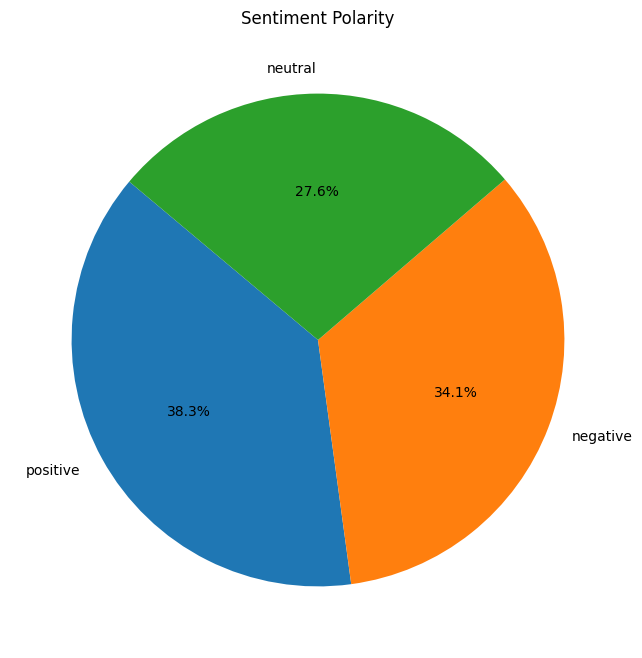

In [18]:
polarity_counts = clean_df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Polarity')
plt.show()

In [19]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_final', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [20]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_final', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [21]:
pd.set_option('display.max_colwidth', 3000)
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_final', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

100%|██████████| 24109/24109 [11:14<00:00, 35.75it/s]  


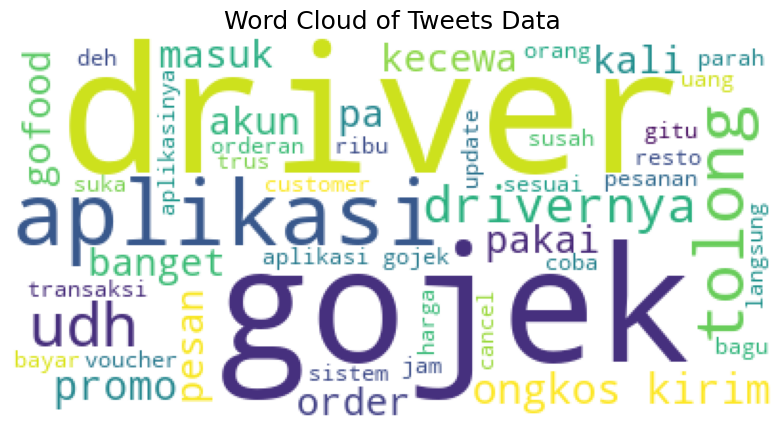

In [22]:
# Word Cloud dari seluruh Tweets
list_all_words = ''

for tweet in tqdm(clean_df['text_stopword']):
    for word in tweet:
        list_all_words += ' ' + (word)

wordcloud = WordCloud(width=400, height=200, background_color='white', min_font_size=10).generate(list_all_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

100%|██████████| 9225/9225 [00:46<00:00, 196.88it/s]  


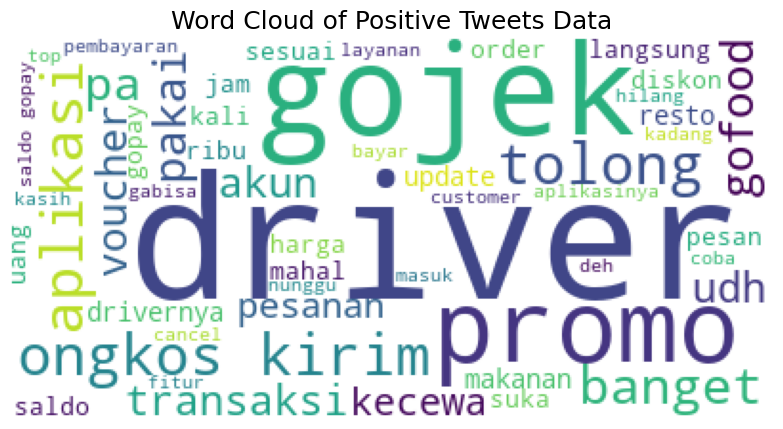

In [23]:
# Word Cloud dari Tweet Negatif
list_positive_words = ''

for tweet in tqdm(positive_tweets['text_stopword']):
    for word in tweet:
        list_positive_words += ' ' + (word)

wordcloud = WordCloud(width=400, height=200, background_color='white', min_font_size=10).generate(list_positive_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

100%|██████████| 8231/8231 [00:46<00:00, 177.28it/s]  


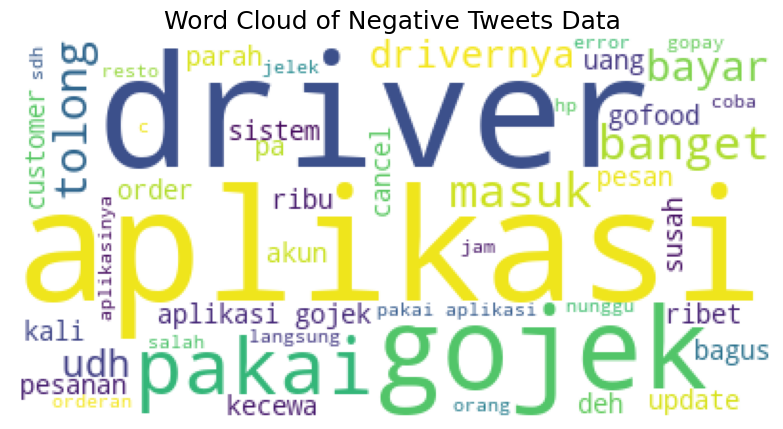

In [24]:
# Word Cloud dari Tweets Positif
list_negative_words = ''

for tweet in tqdm(negative_tweets['text_stopword']):
    for word in tweet:
        list_negative_words += ' ' + (word)

wordcloud = WordCloud(width=400, height=200, background_color='white', min_font_size=10).generate(list_negative_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

100%|██████████| 6653/6653 [00:08<00:00, 799.02it/s]  


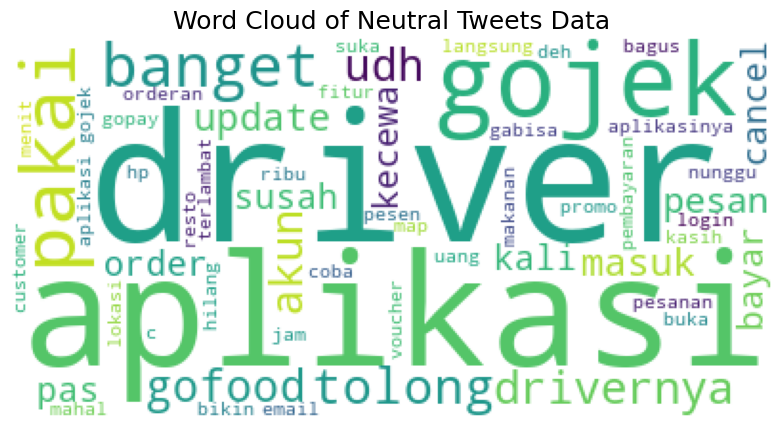

In [25]:
# Word Cloud dari Tweeets Netral
list_neutral_words = ''

for tweet in tqdm(neutral_tweets['text_stopword']):
    for word in tweet:
        list_neutral_words += ' ' + (word)

wordcloud = WordCloud(width=400, height=200, background_color='white', min_font_size=10).generate(list_neutral_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

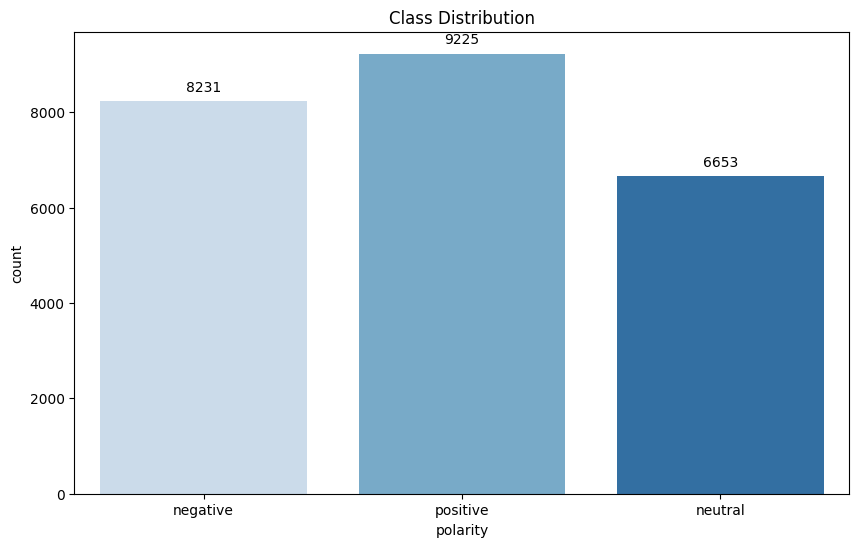

In [26]:
# Visualisasi Distribusi Kelas
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df, palette='Blues')
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

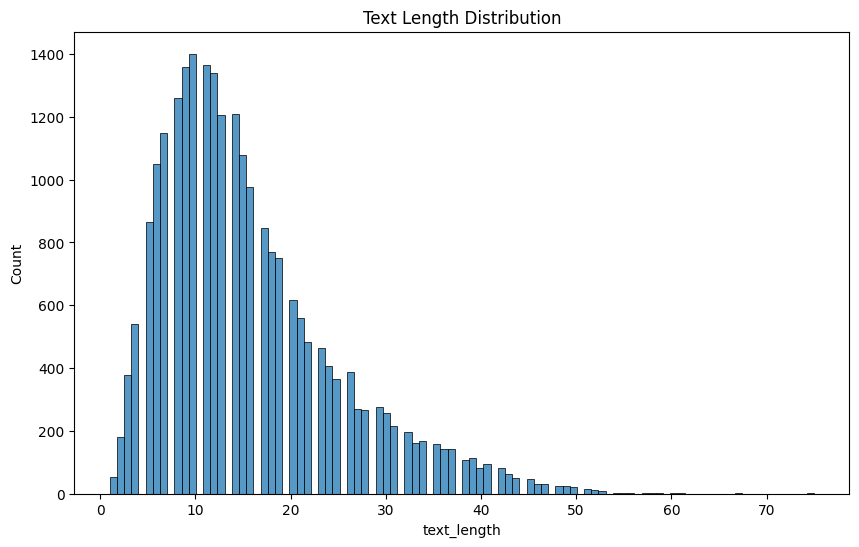

In [27]:
# Visualisasi Panjang Teks
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_final'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'], palette='Blues')
plt.title('Text Length Distribution')
plt.show()

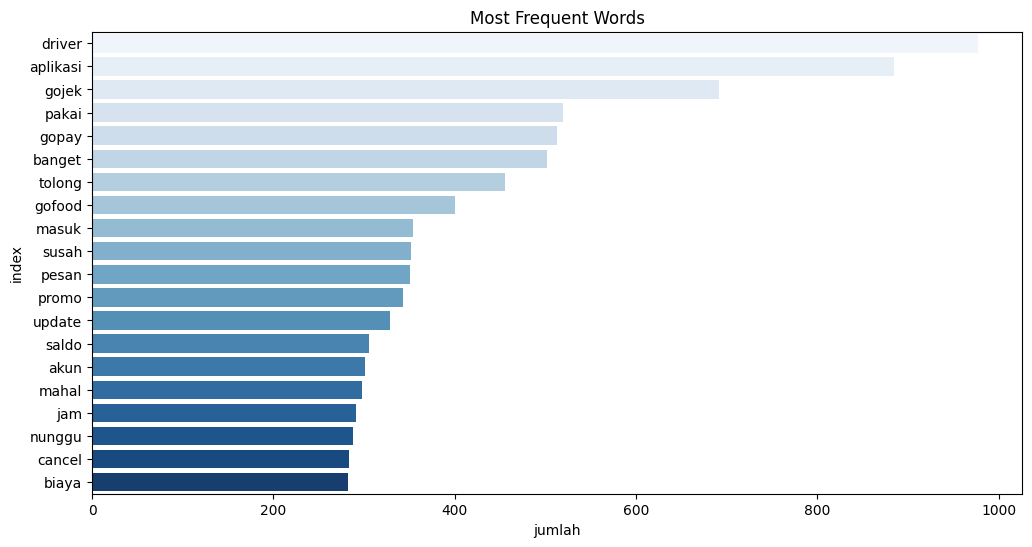

In [28]:
# Visualisasi Frekuensi Kata
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_final'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df, palette='Blues')
plt.title('Most Frequent Words')
plt.show()

**Insight**:
- Dari hasil visualisasi didapatkan polaritas sentimen tertinggi adalah positif (38.3%) dan terendah adalah neutral(27.6%).
- Pada word cloud masih terdapat noise dan outlier.
- Distribusi panjang teks yg tertinggi adalah panjang 10 dengan jumlah 1400.
- Tiga Kata yg sering muncul dengan jumlah terbanyak adalah "driver", "aplikasi" dan "gojek"

## Model Training

In [29]:
X = clean_df['text_final']
y = clean_df['polarity']

In [30]:
# Tokenisasi
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values) 
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)

In [31]:
# Label Encoding
labelencoder = LabelEncoder()
data_encoded = labelencoder.fit_transform(y)
y = to_categorical(data_encoded)

In [32]:
# Class Distribution
num_classes = y.shape[1]
print("Shape of tokenized sequences:", X.shape)
print("Shape of target labels:", y.shape)
print("Number of classes:", num_classes)

Shape of tokenized sequences: (24109, 68)
Shape of target labels: (24109, 3)
Number of classes: 3


In [33]:
# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X, y, test_size=0.2, random_state=42)

print("Pembagian Data LSTM")
print(f"Data latih: {X_train_LSTM.shape}")
print(f"Data uji: {X_test_LSTM.shape}")

Pembagian Data LSTM
Data latih: (19287, 68)
Data uji: (4822, 68)


In [34]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Melatih model
batch_size = 2056
history_LSTM = model_LSTM.fit(
    X_train_LSTM, y_train_LSTM,
    epochs=30,
    batch_size=batch_size,
    verbose=2,
)

# Evaluasi model pada data uji
score_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
print("Test score: %.2f" % score_LSTM)
print("Test accuracy: %.2f" % acc_LSTM)


Epoch 1/30
10/10 - 52s - 5s/step - accuracy: 0.4020 - loss: 5.6012
Epoch 2/30
10/10 - 42s - 4s/step - accuracy: 0.5088 - loss: 4.2751
Epoch 3/30
10/10 - 44s - 4s/step - accuracy: 0.6085 - loss: 3.1679
Epoch 4/30
10/10 - 44s - 4s/step - accuracy: 0.6895 - loss: 2.3350
Epoch 5/30
10/10 - 44s - 4s/step - accuracy: 0.7180 - loss: 1.7848
Epoch 6/30
10/10 - 46s - 5s/step - accuracy: 0.7533 - loss: 1.3807
Epoch 7/30
10/10 - 46s - 5s/step - accuracy: 0.7973 - loss: 1.0685
Epoch 8/30
10/10 - 45s - 5s/step - accuracy: 0.8280 - loss: 0.8595
Epoch 9/30
10/10 - 46s - 5s/step - accuracy: 0.8477 - loss: 0.6963
Epoch 10/30
10/10 - 45s - 5s/step - accuracy: 0.8622 - loss: 0.5889
Epoch 11/30
10/10 - 45s - 5s/step - accuracy: 0.8794 - loss: 0.5047
Epoch 12/30
10/10 - 45s - 5s/step - accuracy: 0.8793 - loss: 0.4569
Epoch 13/30
10/10 - 46s - 5s/step - accuracy: 0.8985 - loss: 0.3989
Epoch 14/30
10/10 - 45s - 5s/step - accuracy: 0.9034 - loss: 0.3671
Epoch 15/30
10/10 - 45s - 5s/step - accuracy: 0.9065 - lo

**Insight:**:
- Pelatihan model menggunakan algoritma deep learning yaitu LSTM dengan pembagian tiga kelas dan pembagian data yakni 80% data latih, 20% data uji. Didapatkan akurasi pada data uji mencapai 0.87 pada 30 epoch.

## Inference Data

In [45]:
new_data = [
    "Pelayanan driver bagus dan ramah",
    "Aplikasi banyak bug, error dan tidak bisa digunakan!",
]

true_labels = ["positive", "negative", "neutral"]

new_sequences = tokenizer.texts_to_sequences(new_data)
new_padded_sequences = pad_sequences(new_sequences, maxlen=X.shape[1])
predictions_LSTM = model_LSTM.predict(new_padded_sequences)
predicted_labels_LSTM = np.argmax(predictions_LSTM, axis=1)
predicted_labels_LSTM = labelencoder.inverse_transform(predicted_labels_LSTM)

for text, true_label, predicted_label in zip(new_data, true_labels, predicted_labels_LSTM):
    print(f"Teks: '{text}'")
    print(f"Label Asli: {true_label}")
    print(f"Prediksi: {predicted_label}")
    print('-' * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Teks: 'Pelayanan driver bagus dan ramah'
Label Asli: positive
Prediksi: positive
--------------------------------------------------
Teks: 'Aplikasi banyak bug, error dan tidak bisa digunakan!'
Label Asli: negative
Prediksi: negative
--------------------------------------------------


**Insight:**:
- Berdasarkan hasil inference dari data baru dapat disimpulkan bahwa model dapat memprediksi dengan baik sesuai label aslinya.